In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def likelihood_ratio(mu1, mu2, std1, std2):
    """
    Partie 'données' du score postérieur : diff / var
    """
    var = std1**2 + std2**2
    A = np.random.normal(mu1, std1)
    B = np.random.normal(mu2, std2)
    dobs = A - B
    return dobs / var

def prior(mu0, std0):
    """
    Partie 'a priori' du score : mu0 / sigma0**2
    """
    return mu0 / (std0**2)

def posterior_score(mu1, std1, mu2, std2, mu0, std0):
    """
    Score proportionnel à mu_post (signe du posterior).
    Agent dit 1 si ce score > 0.
    """
    return prior(mu0, std0) + likelihood_ratio(mu1, mu2, std1, std2)

def agent_response(mu1, std1, mu2, std2, mu0, std0):
    """
    Retourne 1 ou 0 selon la règle bayésienne (seuil 0.5).
    """
    score = posterior_score(mu1, std1, mu2, std2, mu0, std0)
    return 1 if score > 0 else 0

In [11]:
relation = 0.15  # mu0 / sigma0**2

candidates = []
for std0 in np.arange(0.1, 10, 0.2):
    var0 = std0**2
    mu0 = relation * var0
    candidates.append((mu0, std0))

mus_test = [-10,-8,-6,-4,-2,0,2,4,6,8,10]
vars_test = [2,4,6,8]
mu1 = 0.0
std1 = 0.2

total_responses = {}
for mu2 in mus_test:
    for std2 in vars_test:
        responses = []
        for mu0,std0 in candidates:
            moy = 0
            for i in range(500):
                response = agent_response(mu1, std1, mu2, std2, mu0, std0)
                moy += response
            responses.append(moy / 500)
        total_responses[(mu2, std2)] = np.mean(responses)

for mu2 in mus_test:
    for std2 in vars_test:
        print("pour", (mu2, std2), ":", total_responses[(mu2, std2)])
        

pour (-10, 2) : 1.0
pour (-10, 4) : 0.9991599999999999
pour (-10, 6) : 0.99512
pour (-10, 8) : 0.99328
pour (-8, 2) : 1.0
pour (-8, 4) : 0.99524
pour (-8, 6) : 0.9863200000000001
pour (-8, 8) : 0.9859600000000001
pour (-6, 2) : 0.99968
pour (-6, 4) : 0.982
pour (-6, 6) : 0.97064
pour (-6, 8) : 0.9745999999999999
pour (-4, 2) : 0.98948
pour (-4, 4) : 0.94592
pour (-4, 6) : 0.9438399999999999
pour (-4, 8) : 0.9545600000000001
pour (-2, 2) : 0.9011599999999999
pour (-2, 4) : 0.8635600000000001
pour (-2, 6) : 0.8942800000000001
pour (-2, 8) : 0.92424
pour (0, 2) : 0.62212
pour (0, 4) : 0.7280800000000001
pour (0, 6) : 0.82108
pour (0, 8) : 0.8857199999999998
pour (2, 2) : 0.239
pour (2, 4) : 0.53976
pour (2, 6) : 0.7163600000000001
pour (2, 8) : 0.82792
pour (4, 2) : 0.04544000000000001
pour (4, 4) : 0.34907999999999995
pour (4, 6) : 0.60032
pour (4, 8) : 0.76268
pour (6, 2) : 0.00344
pour (6, 4) : 0.18188000000000001
pour (6, 6) : 0.45676
pour (6, 8) : 0.67488
pour (8, 2) : 0.00012
pour (

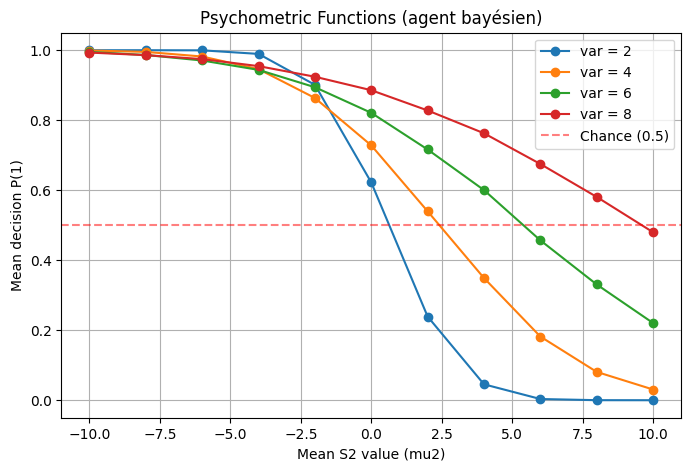

In [12]:
# ----- PLOT des psychometric functions -----
plt.figure(figsize=(8,5))

colors = {2:"tab:blue", 4:"tab:orange", 6:"tab:green", 8:"tab:red"}

for std2 in vars_test:
    xs = mus_test
    ys = [total_responses[(mu2, std2)] for mu2 in mus_test]
    plt.plot(xs, ys, marker="o", label=f"var = {std2}", color=colors[std2])

plt.axhline(0.5, linestyle="--", color="red", alpha=0.5, label="Chance (0.5)")
plt.xlabel("Mean S2 value (mu2)")
plt.ylabel("Mean decision P(1)")
plt.title("Psychometric Functions (agent bayésien)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
mu1  = 0.0
std1 = 0.2
mus_test  = [-10,-8,-6,-4,-2,0,2,4,6,8,10]
vars_test = [2,4,6,8]

def simulate_candidate(mu0, std0, n_trials=1000):
    results = {}
    for mu2 in mus_test:
        for std2 in vars_test:
            count = 0
            for _ in range(n_trials):
                count += agent_response(mu1, std1, mu2, std2, mu0, std0)
            results[(mu2, std2)] = count / n_trials
    return results


In [ ]:
def mse_candidate(mu0, std0, target, n_trials=2000):
    sim = simulate_candidate(mu0, std0, n_trials=n_trials)
    err = 0.0
    for key, target_val in target.items():
        err += (sim[key] - target_val)**2
    return err / len(target)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


def psycometrique(data_tuple,var2):
    result, mean_used = data_tuple
    true_array_mean_used = []
    true_array_result = []
    block_size = 200          
    big_blocs = 11           # nb de valeurs de S2 par courbe
    size_one_block = block_size * big_blocs  

    for j in range(len(var2)):
        array_mean_result = []
        array_mean_used = []
        for i in range(0, size_one_block, block_size):
            # bloc de result
            block_r = result[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_r = sum(block_r) / len(block_r)
            array_mean_result.append(mean_r)

            # bloc de mean_used
            block_m = mean_used[size_one_block*j + i : size_one_block*j + i+block_size]
            mean_m = sum(block_m) / len(block_m)
            array_mean_used.append(mean_m)

        true_array_result.append(array_mean_result)
        true_array_mean_used.append(array_mean_used)
    return true_array_result, true_array_mean_used


def data_var2(file_path):
    df = pd.read_csv(file_path)
    var2 = df['S2_std'].to_numpy()
    var2 = pd.unique(var2)      
    return list(var2)           


def ploter(mean_used_all, mean_res_all, var, var1=0.2):
    """
    Combine les deux anciens graphiques :
    - subplot 1 : psychometric curves (x_star search)
    - subplot 2 : slopes = x_star / (var + var1)
    """

    seuil = 0.5
    x_stars = []

    fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    ax1, ax2 = axes

    # ==========================================
    # ---------- SUBPLOT 1 : courbes ----------
    # ==========================================
    print("=== Points d’intersection avec P = 0.5 ===")

    for idx, (x_vals, y_vals) in enumerate(zip(mean_used_all, mean_res_all)):
        print(x_vals)
        print(y_vals)
        break
        # tracer la courbe
        line, = ax1.plot(x_vals, y_vals, 'o-', label=f'var = {var[idx]}')
        color = line.get_color()

        # --- recherche du passage par 0.5 ---
        x_cross = None
        for x1, y1, x2, y2 in zip(x_vals[:-1], y_vals[:-1],
                                  x_vals[1:],  y_vals[1:]):
            if (y1 - seuil) * (y2 - seuil) <= 0 and y1 != y2:
                x_cross = x1 + (seuil - y1) * (x2 - x1) / (y2 - y1)
                break

        if x_cross is not None:
            ax1.scatter([x_cross], [seuil], color=color, zorder=5)
            ax1.text(x_cross, seuil + 0.03, f'{x_cross:.2f}',
                     color=color, ha='center', va='bottom', fontsize=8)
            print(f'Bloc {idx+1} : x = {x_cross:.3f}')
        else:
            print(f'Bloc {idx+1} : pas de croisement avec 0.5')

        x_stars.append(x_cross)

    ax1.axhline(seuil, color='red', linestyle='--', linewidth=1.5,
                label='Chance level (0.5)')

    ax1.set_xlabel('Mean S2 value')
    ax1.set_ylabel('Mean decision (P[1])')
    ax1.set_title('Psychometric Functions')
    ax1.grid(True, alpha=0.3)
    ax1.legend()

    # ==========================================
    # ---------- SUBPLOT 2 : slopes -----------
    # ==========================================

    slopes = slope_x(x_stars, var, var1)
    ax2.plot(range(1, len(slopes)+1), slopes, marker='o')
    ax2.set_xlabel("Index")
    ax2.set_ylabel("Slope (≈ m0 / s0²)")
    ax2.set_title("Slope evolution")
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return x_stars, slopes


def reading_csv(file_path):
    df = pd.read_csv(file_path)
    mean_used = df['S2_val'].tolist()
    result = df['Decision (S1>S2)'].tolist()
    data_tuple = (result, mean_used)  
    print(len(result))
    return data_tuple


def slope_x(x_star, var2, var1=0.2):
    slopes = []
    for x, v in zip(x_star, var2):
        slopes.append(x / (v**2 + var1**2))

    return slopes


def main():
    print('test')
    file_path = "C:\\Users\\gabri\\Desktop\\bayesian\\experiment_results_test.csv"
    data_tuple = reading_csv(file_path)
    var2 = data_var2(file_path)
    array_mean_result, array_mean_used = psycometrique(data_tuple, var2)
    x_stars, slopes = ploter(array_mean_used, array_mean_result, var2)
    print("Slopes (≈ m0 / s0^2) :", slopes)
    print("x_stars :", x_stars)

if __name__ == "__main__":
    main()


# we have m0 / so**2 = 0.15 in average 